# Problem: Bike rental forecast
- datetime - hourly date + timestamp
- season - 1 = spring, 2 = summer, 3 = fall, 4 = winter
- holiday - whether the day is considered a holiday
- workingday - whether the day is neither a weekend nor holiday
- weather -
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp - temperature in Celsius
- atemp - "feels like" temperature in Celsius
- humidity - relative humidity
- windspeed - wind speed
- casual - number of non-registered user rentals initiated
- registered - number of registered user rentals initiated
- count - number of total rentals (Dependent Variable)

In [74]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import calendar
from datetime import datetime

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
import time



%matplotlib inline

In [75]:
bike = pd.read_csv('/Users/sabrinafruhauf/Desktop/05_SpicedCourse/Week_03_regression/bike-sharing-demand/train.csv', parse_dates=True)
bike.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [76]:
bike.shape

(10886, 12)

In [77]:
bike.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [78]:
days = {'Monday':0, 'Tuesday':1, 'Wednesday':2, 'Thursday':3, 'Friday':4, 'Saturday':5, 'Sunday':6}

bike["date"] = bike.datetime.apply(lambda x : x.split()[0])
bike["year_num"] = bike.date.apply(lambda x : x.split('-')[0]).astype('int')
bike["month_num"] = bike.date.apply(lambda x : x.split('-')[1]).astype('int')
bike["day_num"] = bike.date.apply(lambda x : x.split('-')[2]).astype('int')
bike["month"] = bike.date.apply(lambda dateString : calendar.month_name[datetime.strptime(dateString,"%Y-%m-%d").month])
bike["weekday"] = bike.date.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString,"%Y-%m-%d").weekday()])
bike["weekday_num"] = bike['weekday'].apply(lambda x: days[x])
bike["hour"] = bike.datetime.apply(lambda x : x.split()[1].split(":")[0]).astype('int')



In [79]:
bike.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year_num,month_num,day_num,month,weekday,weekday_num,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,1,1,January,Saturday,5,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,1,1,January,Saturday,5,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,1,1,January,Saturday,5,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,2011,1,1,January,Saturday,5,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,2011,1,1,January,Saturday,5,4


In [80]:
bike.dtypes

datetime        object
season           int64
holiday          int64
workingday       int64
weather          int64
temp           float64
atemp          float64
humidity         int64
windspeed      float64
casual           int64
registered       int64
count            int64
date            object
year_num         int64
month_num        int64
day_num          int64
month           object
weekday         object
weekday_num      int64
hour             int64
dtype: object

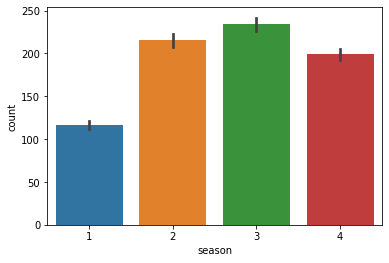

In [81]:
sns.barplot(x='season', y='count', data=bike);

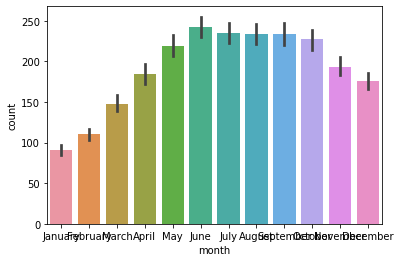

In [82]:
sns.barplot(x='month', y='count', data=bike);

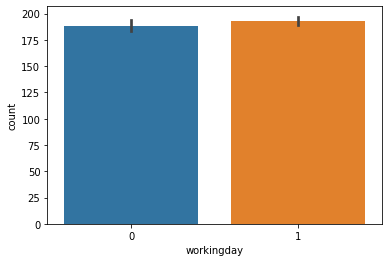

In [83]:
sns.barplot(x='workingday', y='count', data=bike);

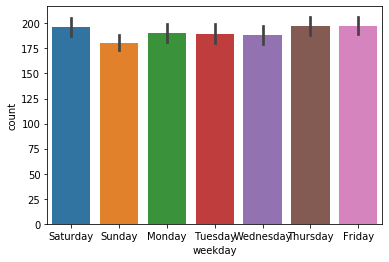

In [84]:
sns.barplot(x='weekday', y='count', data=bike);

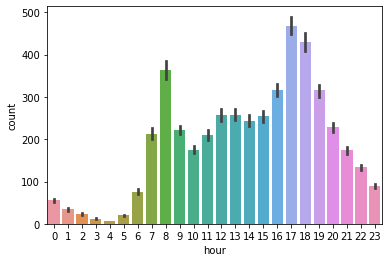

In [85]:
sns.barplot(x='hour', y='count', data=bike);

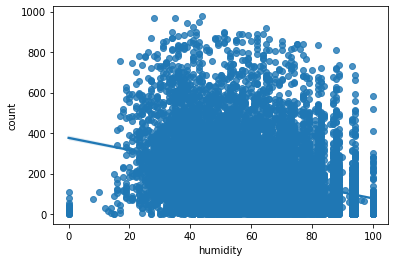

In [86]:
sns.regplot(x="humidity", y="count", data=bike)

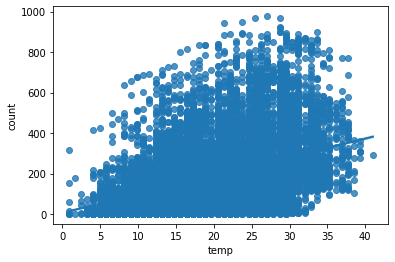

In [87]:
sns.regplot(x="temp", y="count", data=bike)

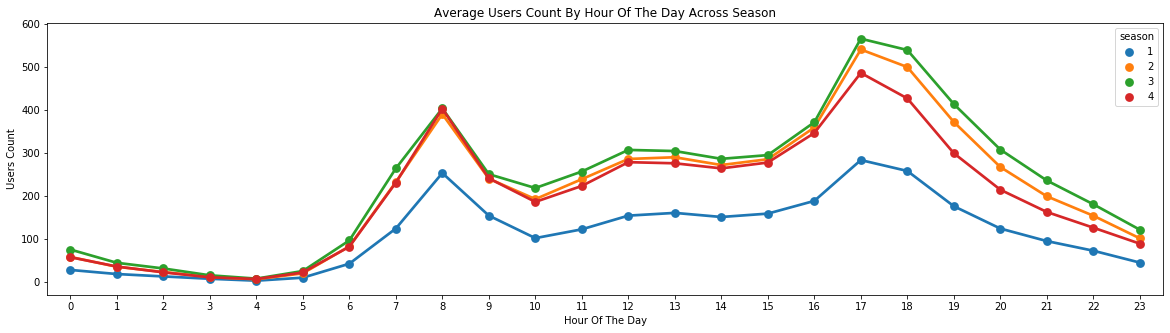

In [91]:
hourAggregated = pd.DataFrame(bike.groupby(["hour","season"],sort=True)["count"].mean()).reset_index()
plt.figure(figsize=(20,5))
sns.pointplot(x=hourAggregated["hour"], 
              y=hourAggregated["count"],
              hue=hourAggregated["season"], 
              data=hourAggregated, join=True).set(xlabel='Hour Of The Day', 
                                                  ylabel='Users Count',
                                                  title="Average Users Count By Hour Of The Day Across Season",
                                                  label='big')
plt.savefig("plots/average_users_count_by_hour_across_season.png")

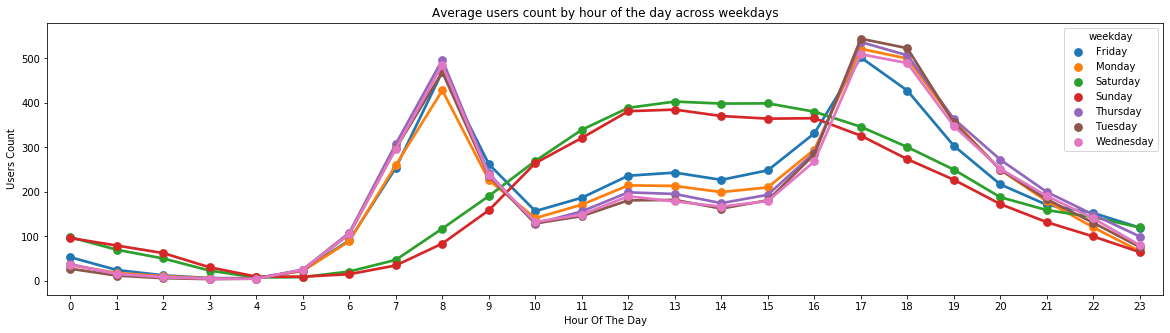

In [92]:
hourAggregated = pd.DataFrame(bike.groupby(["hour","weekday"],sort=True)["count"].mean()).reset_index()
plt.figure(figsize=(20,5))
sns.pointplot(x=hourAggregated["hour"], 
              y=hourAggregated["count"],
              hue=hourAggregated["weekday"], 
              data=hourAggregated, 
              join=True,
              ).set(xlabel='Hour Of The Day', 
                    ylabel='Users Count',
                    title="Average users count by hour of the day across weekdays", 
                    label='big')
plt.savefig("plots/average_users_count_by_hour_across_weekdays.png")

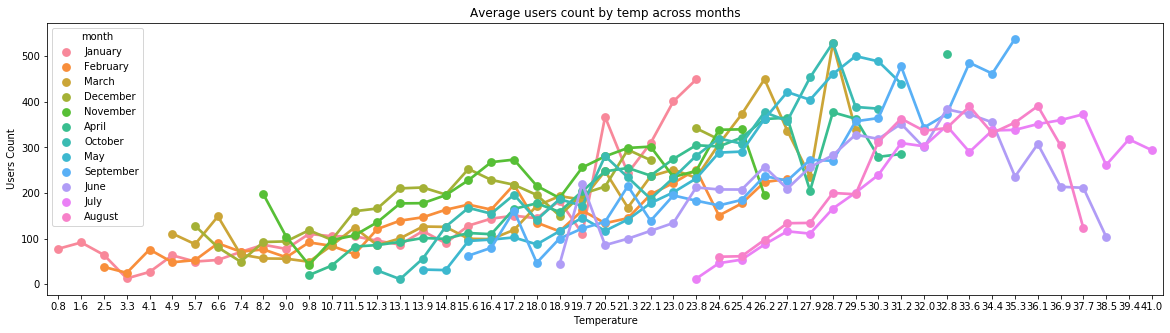

In [93]:
tempAggregated = pd.DataFrame(bike.groupby(["temp","month"],sort=True)["count"].mean()).reset_index()
plt.figure(figsize=(20,5))
sns.pointplot(x=tempAggregated["temp"].round(1), 
              y=tempAggregated["count"],
              hue=tempAggregated["month"], 
              data=tempAggregated, join=True).set(xlabel='Temperature', 
                                                  ylabel='Users Count',
                                                  title="Average users count by temp across months",
                                                  label='big')
plt.savefig("plots/average_users_count_by_temp_across_months.png")

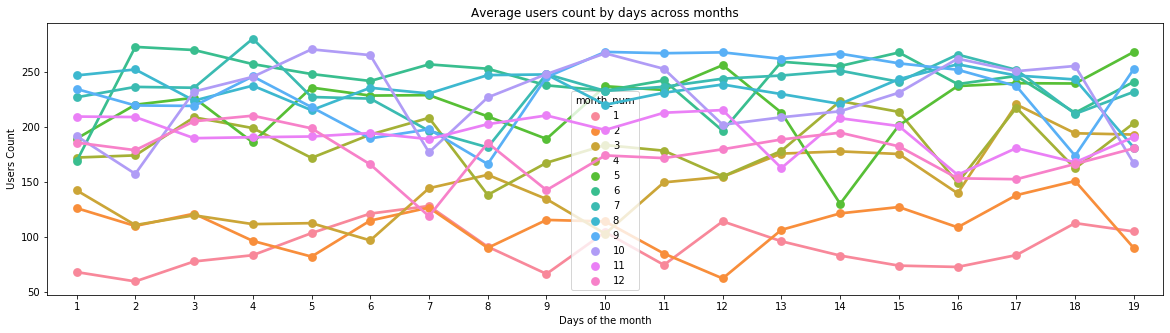

In [94]:
dayAggregated = pd.DataFrame(bike.groupby(["day_num","month_num"],sort=True)["count"].mean()).reset_index()
plt.figure(figsize=(20,5))
sns.pointplot(x=dayAggregated["day_num"].round(1), 
              y=dayAggregated["count"],
              hue=dayAggregated["month_num"], 
              data=dayAggregated, join=True).set(xlabel='Days of the month', 
                                                  ylabel='Users Count',
                                                  title="Average users count by days across months",
                                                  label='big')
plt.savefig("plots/average_users_count_by_days_across_months.png")

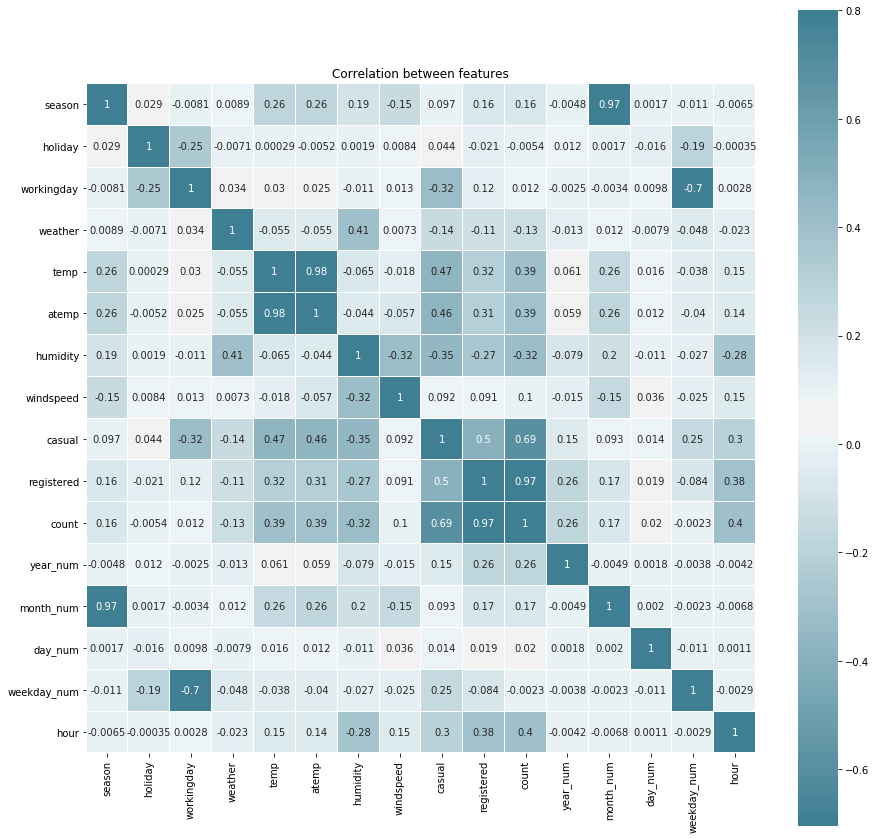

In [63]:
corr=bike.corr() #["count"]
plt.figure(figsize=(15, 15))
sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap=sns.diverging_palette(220, 220, n=100),linecolor='white')
plt.title('Correlation between features');

In [64]:
bike.corr()["count"].abs().sort_values(ascending=False)

count          1.000000
registered     0.970948
casual         0.690414
hour           0.400601
temp           0.394454
atemp          0.389784
humidity       0.317371
year_num       0.260403
month_num      0.166862
season         0.163439
weather        0.128655
windspeed      0.101369
day_num        0.019826
workingday     0.011594
holiday        0.005393
weekday_num    0.002283
Name: count, dtype: float64

In [65]:
bike.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'date', 'year_num', 'month_num', 'day_num', 'month', 'weekday',
       'weekday_num', 'hour'],
      dtype='object')

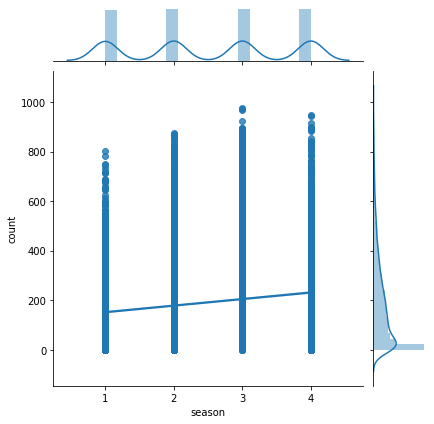

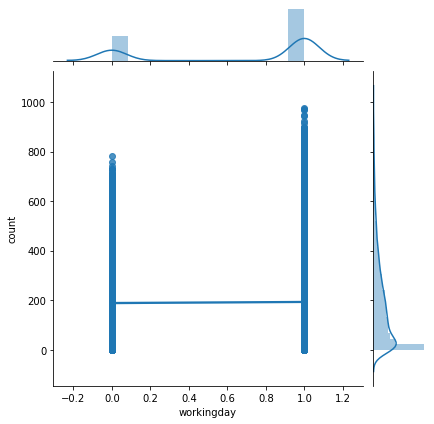

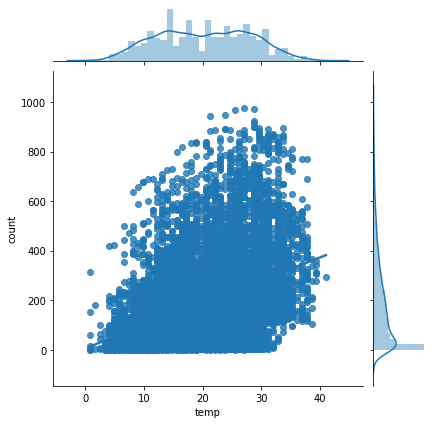

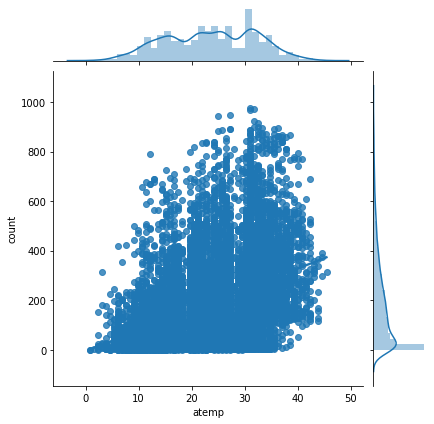

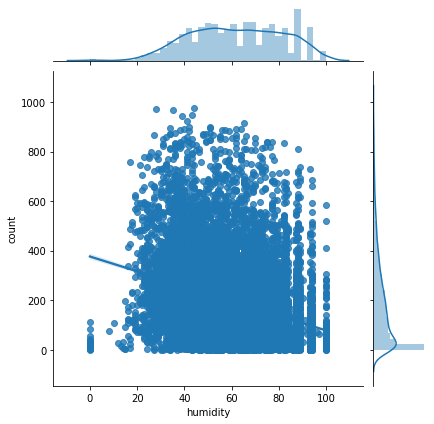

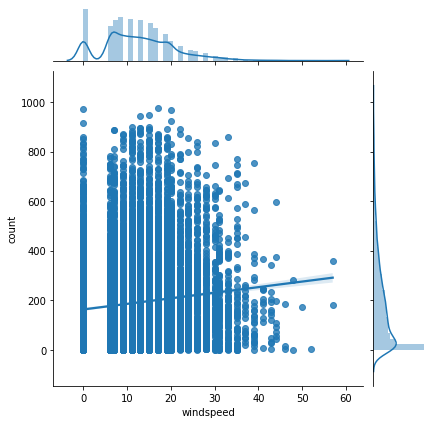

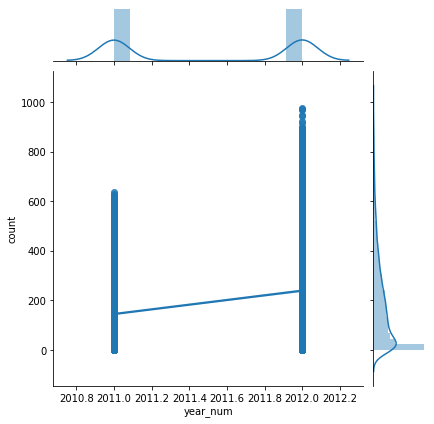

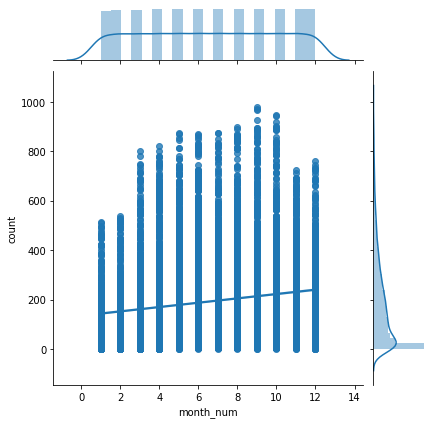

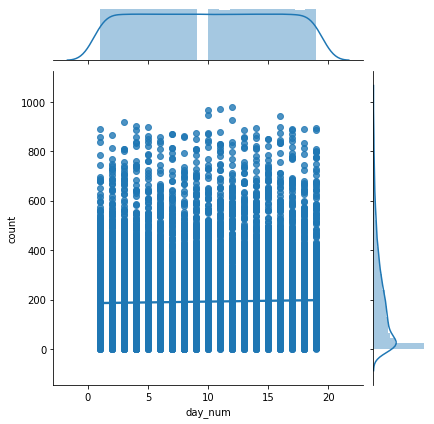

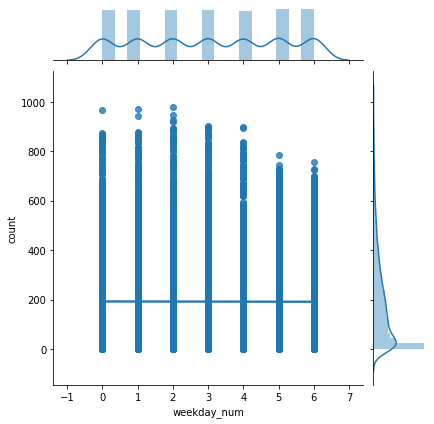

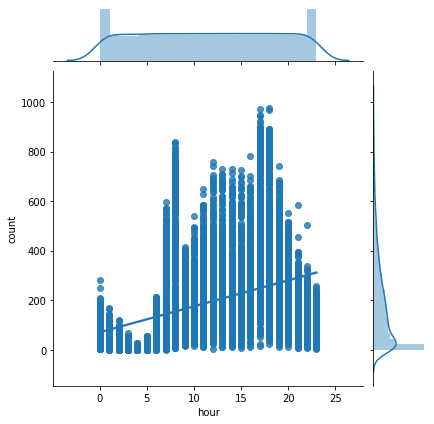

In [66]:
print(sns.jointplot(x='season', y='count', data=bike, kind='reg'))
print(sns.jointplot(x='workingday', y='count', data=bike, kind='reg'))
print(sns.jointplot(x='temp', y='count', data=bike, kind='reg'))
print(sns.jointplot(x='atemp', y='count', data=bike, kind='reg'))
print(sns.jointplot(x='humidity', y='count', data=bike, kind='reg'))
print(sns.jointplot(x='windspeed', y='count', data=bike, kind='reg'))
print(sns.jointplot(x='year_num', y='count', data=bike, kind='reg'))
print(sns.jointplot(x='month_num', y='count', data=bike, kind='reg'))
print(sns.jointplot(x='day_num', y='count', data=bike, kind='reg'))
print(sns.jointplot(x='weekday_num', y='count', data=bike, kind='reg'))
print(sns.jointplot(x='hour', y='count', data=bike, kind='reg'))